In [1]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"Chapter 2 - housing.csv")

In [3]:
df 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df["ocean_proximity"].value_counts()
#count the number of each categorty in the column


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: ylabel='ocean_proximity'>

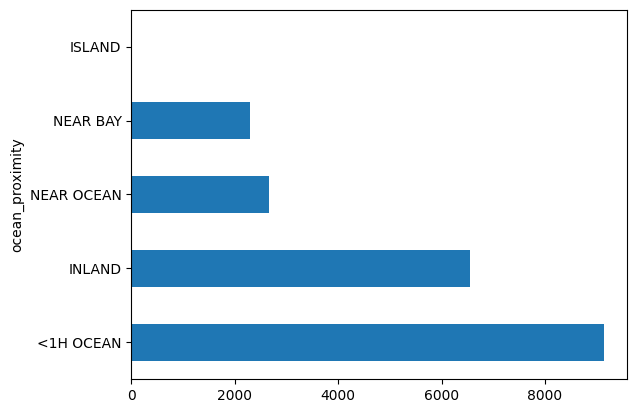

In [5]:
df["ocean_proximity"].value_counts().plot(kind = "barh")

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

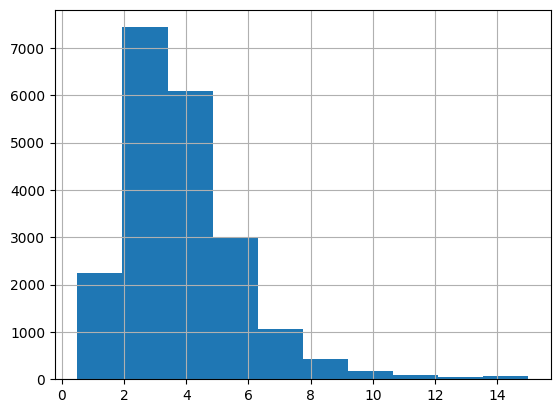

In [7]:
df["median_income"].hist()

In [8]:
df ["income_cat"] = pd.cut(df["median_income"] , 
                            bins = [0 , 1.5 , 3 , 4.5 , 6 , np.inf] , 
                            labels = [1,2,3,4,5])
df ["income_cat"]
#creat a new column where the new column catigories all the descreat values into 5 ranges each with 1.5 raange diffrence 


0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<Axes: >

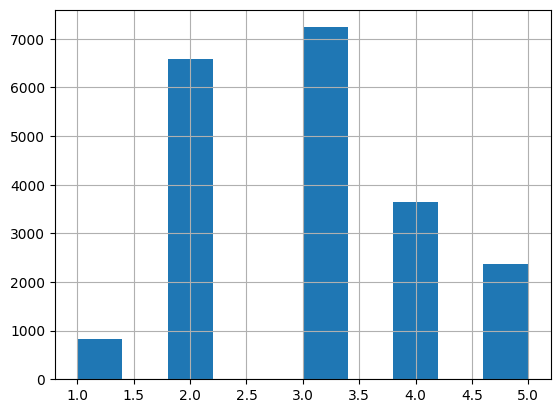

In [9]:
df ["income_cat"].hist()

In [10]:
y = df["median_house_value"]
X = df.drop("median_house_value", axis  = 1)
X
#creat X and y datasets to split and train the ml model


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33) 
# X dataset is the columns that we study in order to oredicr the solution 
# y dataset is the solution that we create the model in order to predict it 


In [12]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
19669,-120.84,37.51,8.0,1191.0,242.0,688.0,260.0,2.7243,INLAND,2
407,-122.27,37.89,52.0,3046.0,373.0,975.0,365.0,8.8342,NEAR BAY,5
16927,-122.33,37.58,43.0,1772.0,422.0,1573.0,401.0,2.7474,NEAR OCEAN,2
11759,-121.24,38.72,12.0,3605.0,576.0,1556.0,549.0,4.9000,INLAND,4
1300,-121.81,38.00,37.0,2724.0,579.0,1400.0,540.0,2.9050,INLAND,2
...,...,...,...,...,...,...,...,...,...,...
4524,-118.21,34.05,28.0,1841.0,809.0,3199.0,727.0,1.6319,<1H OCEAN,2
4705,-118.34,34.06,52.0,2069.0,417.0,826.0,377.0,3.5481,<1H OCEAN,3
11603,-118.02,33.79,23.0,6368.0,1030.0,3281.0,1001.0,6.1142,<1H OCEAN,5
2930,-119.00,35.36,39.0,896.0,217.0,805.0,197.0,1.2500,INLAND,1


<Axes: >

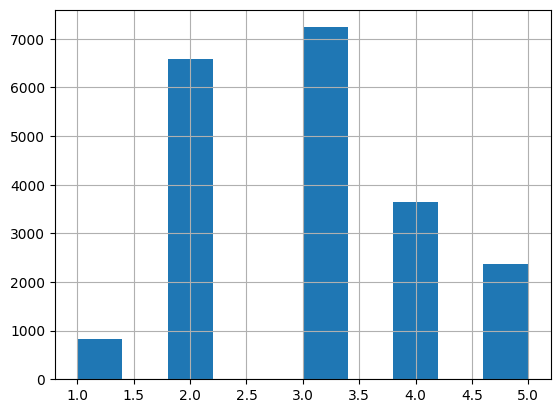

In [13]:
df["income_cat"].hist()

<Axes: >

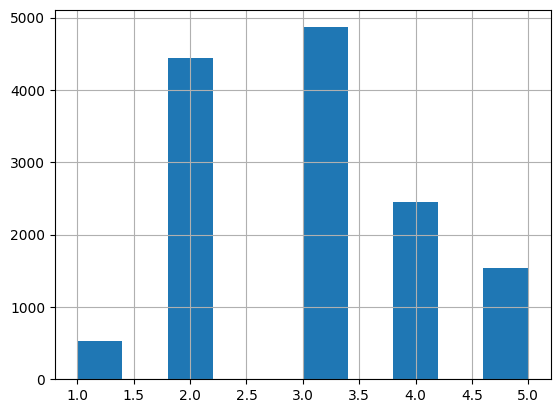

In [14]:
X_train["income_cat"].hist()
#the values distribiution of income catagory in the dataset should be aproximately equal to the datafrem's
#if the values distribiution bet the df and the training set is too far we use stratified split


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
# Create a stratified split object
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [17]:
# Perform the split
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
#split the data using income cat column ensures that the class distribution in the train and test sets are similar to the original dataset


<Axes: >

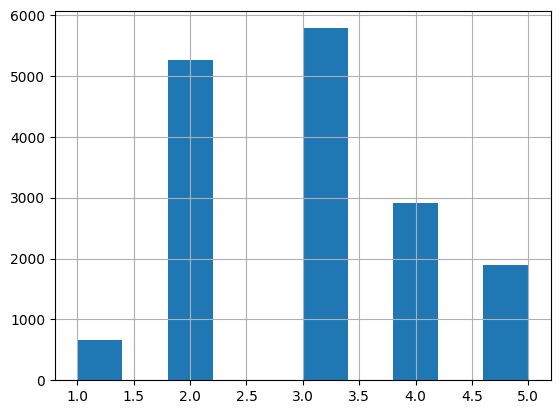

In [18]:
strat_train_set["income_cat"].hist()

In [19]:

strat_train_set["income_cat"].value_counts() / len(strat_train_set)


income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [20]:
df["income_cat"].value_counts() / len(df)
# the ration bet the strat_train_set and the df are nearly equal and that is what we want


income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [21]:
strat_train_set.drop("income_cat", axis = "columns", inplace= True)
strat_test_set.drop("income_cat", axis = "columns", inplace= True)
#remove income_cat as it is not usefull in the creating of ml model 


In [22]:
df1 = strat_train_set.copy()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

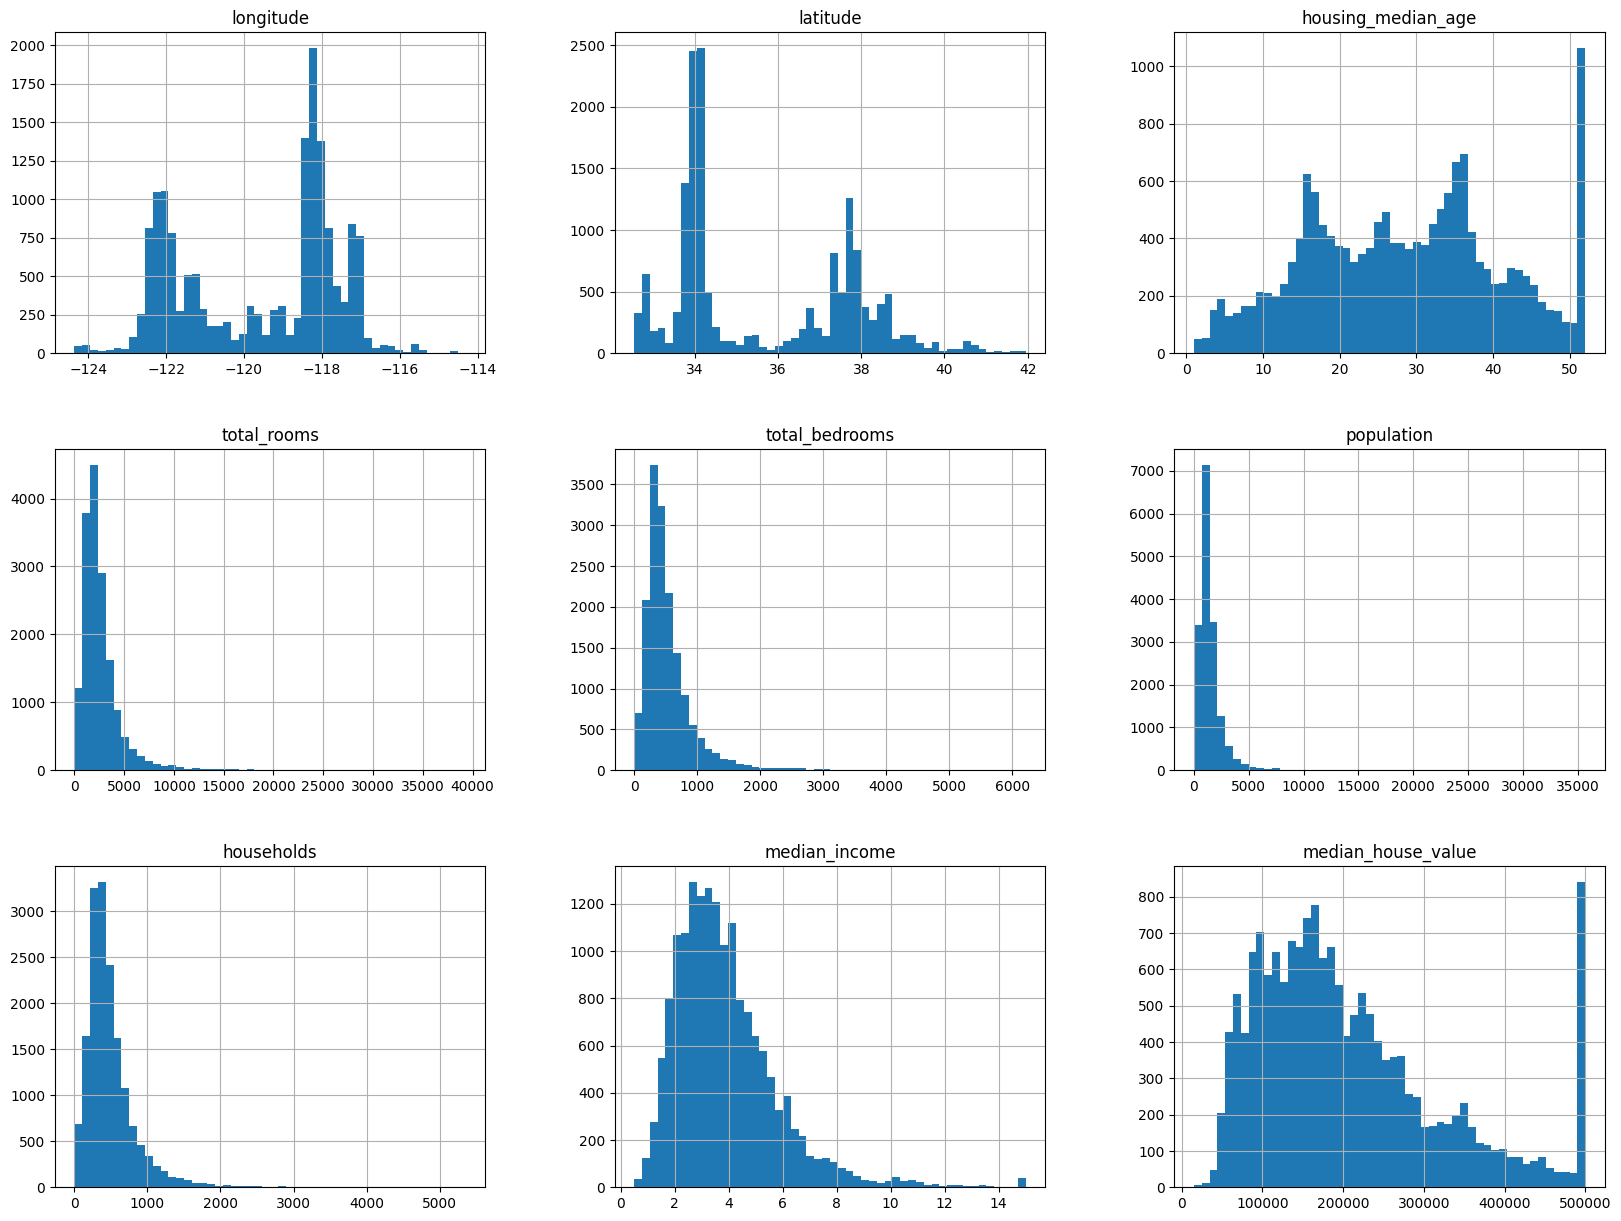

In [23]:
df1.hist(bins  = 50 ,figsize= (20,15) )

<Axes: >

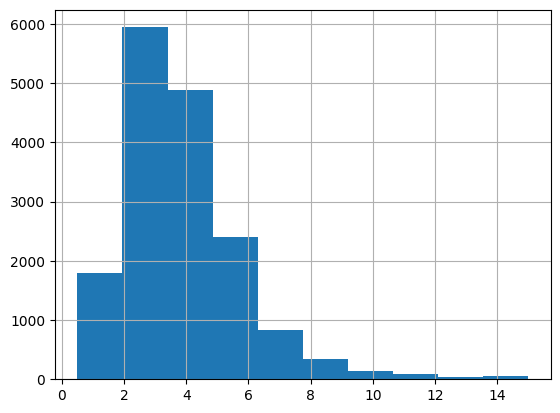

In [24]:
df1["median_income"].hist()

<Axes: >

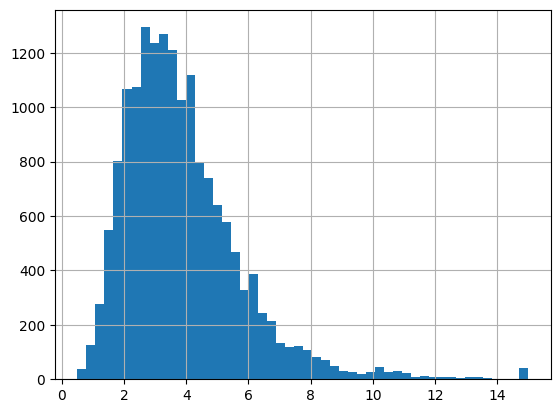

In [25]:
df1["median_income"].hist(bins = 50)
#bins increase or deacrease the range of the values 


In [26]:
df1.corr(numeric_only=True)
#corrilation is shows the relation of every column with each other
#if you have string column you must write numeric_only=True


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


<Axes: >

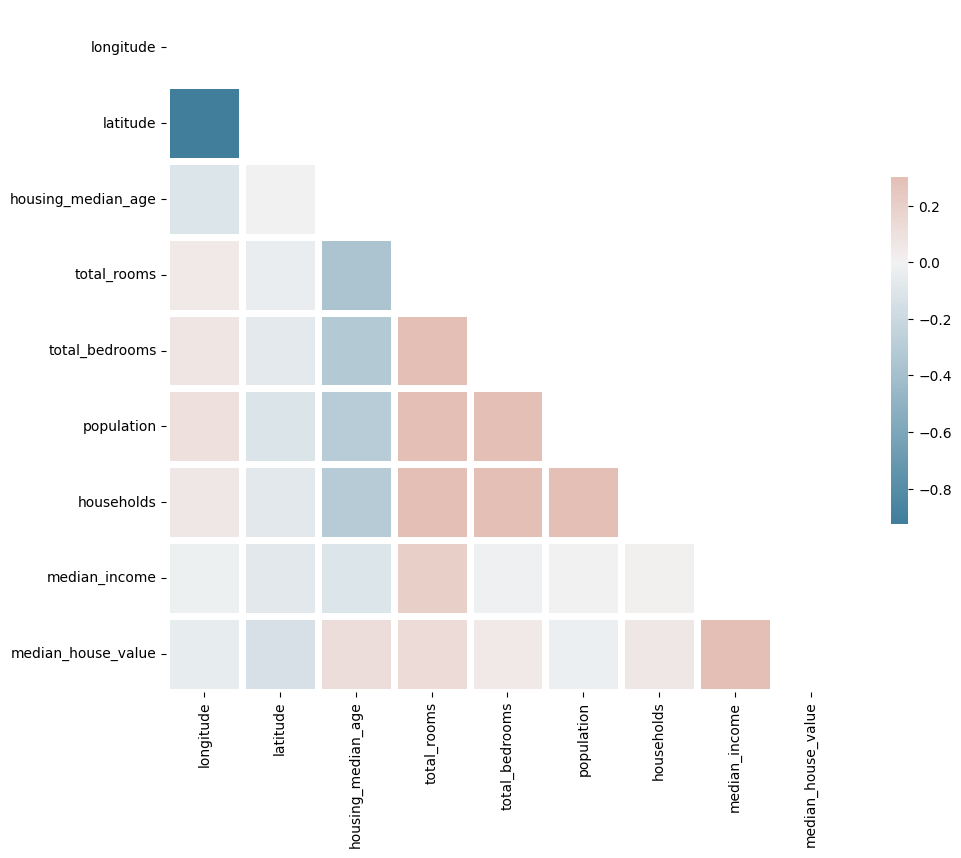

In [27]:
corr = df1.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr , dtype=bool))
f , ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=5, cbar_kws={"shrink": .5} )
#corrilation heat map code


In [28]:
housing = strat_train_set.drop("median_house_value", axis  = 1)
housing_labels = strat_train_set["median_house_value"].copy


In [29]:
housing.count().isnull()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

In [30]:
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
sample_incomplete_rows
#searching null values by searching columns (axis = 1)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [31]:
#option 1 in dealing with missing values 
sample_incomplete_rows.dropna(subset = ["total_bedrooms"] )
#it drops rows that contain any missing values in total_bedrooms column
#in this way we only remove the rows that contain any missing values


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [32]:
#option 2 in dealing with missing values 
sample_incomplete_rows.drop("total_bedrooms", axis=1 )
#in this way we remove the whole column thaat contain missing values


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [33]:
#option 3 (imputation manually)
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows
#in this way we inplace the missing values of the total_bedrooms column by the median value of the column(433) 


C:\Users\AFRAAD-PC1\AppData\Local\Temp\ipykernel_24840\2156069613.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median" )
#we fill messing values by the median value of the column


In [35]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num
#selects all columns from the housing DataFrame that have numerical data types and stores them in the housing_num DataFrame.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [36]:
imputer.fit(housing_num)
#use the imputer function to fill messing values by the median value of the column


SimpleImputer(strategy='median')

In [37]:
X = imputer.transform(housing_num)
#replaces any missing values in the numerical columns with their respective column medians. The result is stored in X, which is a NumPy array containing the transformed data.


In [38]:
#note sklearn transform almost everything into numpy array, so we need to transform it into pandas dataframe
housing_tr = pd.DataFrame(X , columns = housing_num.columns , index = housing_num.index)
housing_tr
#converts the transformed NumPy array X back into a pandas DataFrame, with the original column names (housing_num.columns) and the same row index (housing_num.index) as in the original housing_num DataFrame.
#This outputs the final transformed DataFrame, housing_tr, which is the same as housing_num but with missing values replaced by medians.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [39]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)
housing_cat = housing_cat.values.reshape(-1, 1)
#The OneHotEncoder expects its input to be 2D (because it works with multiple samples and features). A Series is considered 1D (one-dimensional), even if it has multiple rows.
#By converting the Series to a DataFrame or reshaping it to a 2D array, you make it compatible with OneHotEncoder, allowing it to treat it as a single column of categorical data.


In [40]:
from sklearn.preprocessing import OneHotEncoder
cat_encodder = OneHotEncoder(sparse_output = False)
housing_cat_1hot = cat_encodder.fit_transform(housing_cat) 
housing_cat_1hot
#change the column's values to 1 hot encoder


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [41]:
#feature engineeringis the process of creating new features (variables) from existing data to improve the performance of a machine learning model.
def feature_engineering (data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    return data
#A function named feature_engineering is defined, which takes a DataFrame data (in this case, housing) as an input.


In [42]:
#Inside this function, three new features (columns) are created by combining or transforming the existing columns in the dataset.

In [43]:
housing_feature_engineered = feature_engineering(housing_tr)
#The feature_engineering() function is called with the imputed housing_num DataFrame (housing_tr) as input.
#The result is stored in a new variable, housing_feature_engineering, which contains the original housing data along with the three new features (bedrooms_per_household, population_per_household, and rooms_per_household).
features = list(housing_feature_engineered.columns)
#features is a variable contain the columns of the housing_feature_engineered


In [44]:
#Data scaling is the process of transforming the features of your dataset so that they are on a similar scale or range.
#In machine learning, many algorithms compute the distances between data points (e.g., in clustering or regression), and if the features are on different scales, this can distort the results aas the algorithm might think some feature is more important than the other due to scale diffrence.
#Without scaling, features with larger magnitudes may unduly influence the model. 
# For example, in a dataset containing income (values in thousands) and age (values in tens), the model might give more importance to income than age, simply because of its scale, even though both could be equally important for predictions.
from sklearn.preprocessing import StandardScaler
# Initialize the scaler (note the parentheses)


In [45]:
scaler = StandardScaler()
# Fit the scaler to the data and transform it
housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.04629766,
         0.00622264,  0.01739526],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.01826884,
        -0.04081077,  0.56925554],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.12524691,
        -0.07537122, -0.01802432],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.2477044 ,
        -0.03743619, -0.5092404 ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.09797804,
        -0.05915604,  0.32814891],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.04272245,
         0.00657083,  0.01407228]])

In [46]:
output = np.hstack([housing_scaled , housing_cat_1hot])

In [47]:
# Dropping the target variable 'median_house_value'
housing = strat_train_set.drop("median_house_value", axis=1)
# Creating a copy of the target variable as 'housing_labels'
housing_labels = strat_train_set["median_house_value"].copy()
# Function for data transformations
def data_transformations(data):
    ### Separate Labels if they Exist ###
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
    else:
        labels = None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns)  # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)
    
    ### Encoding Categorical Data ###

    housing_cat = feature_engineered_data.select_dtypes(exclude = [np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encodder = OneHotEncoder(sparse_output = False)

    housing_cat_1hot = cat_encodder.fit_transform(housing_cat) 
    features = features + cat_encodder.categories_[0].tolist()
    features.remove("ocean_proximity") #we dont need this in encoding

    ### Scaling Numerical Data ###
    
    from sklearn.preprocessing import StandardScaler

    # Initialize the scaler (note the parentheses)
    scaler = StandardScaler()

    # Fit the scaler to the data and transform it
    housing_scaled = scaler.fit_transform(imputed)

    ### Concatening all Data ###

    output = np.hstack([housing_scaled , housing_cat_1hot])
    return output , labels , features
    #labels is the same as housing_labels


In [48]:
train_data , train_labels, features = data_transformations(strat_train_set)
#call the data_transformations function to do all the data preparation for the strat train dataset


In [49]:
#featuers is other word for columns

test_data , test_labels, features = data_transformations(strat_test_set)
#call the data_transformations function to do all the data preparation for the strat test dataset


In [50]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_data,train_labels)


LinearRegression()

In [51]:
original_values = test_labels[:5]
predict_values = lin_reg.predict(test_data[:5])


In [52]:
# Select first 5 labels from the test set
original_values = test_labels[:5]
# Predict the first 5 test data points
predicted_values = lin_reg.predict(test_data[:5])
# Create a comparison dataframe with original and predicted values
comparison_dataframe = pd.DataFrame(data={
    "Original Values": original_values,
    "Predicted Values": predicted_values
})
# Calculate the differences between original and predicted values


In [53]:
comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]
# Display the comparison dataframe
comparison_dataframe


,Original Values,Predicted Values,Differences
5241,500001.0,421436.985982,78564.014018
17352,162500.0,288955.577066,-126455.577066
3505,204600.0,244465.297215,-39865.297215
7777,159700.0,195506.027223,-35806.027223
14155,184000.0,259951.750767,-75951.750767


In [54]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(original_values ,predicted_values )
lin_rmse = np.sqrt(lin_mse)
lin_rmse
#calculating the mean square error and root mean square error


np.float64(78489.8709666807)

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 43)
tree_reg.fit(train_data,train_labels)


DecisionTreeRegressor(random_state=43)

In [56]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels ,train_predictions )
tree_rmse = np.sqrt(tree_mse)
tree_rmse
#over_fitting as tree_rmse = 0

np.float64(0.0)

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,train_data,train_labels , scoring="neg_mean_squared_error",cv= 10 )
tree_rmse_scores = np.sqrt(-scores)
#cross validation used to train data on smaller dataset to decrease overfitting

In [58]:
def display_scores(scores):
    print("Scores",scores)
    print("Mean:",scores.mean())
    print("Standard diviation:" , scores.std())
display_scores(tree_rmse_scores)
#function for display scores of the machine learning models


Scores [70410.36517795 68452.84395085 70848.20772371 72959.61766191
 67292.75891192 72368.61169224 75896.48394142 69664.60350673
 70910.86553582 73382.11189143]
Mean: 71218.64699939883
Standard diviation: 2393.2974236974414


In [59]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 100 , random_state = 42)
forest_reg.fit(train_data,train_labels)


RandomForestRegressor(random_state=42)

In [60]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels ,train_predictions )
forest_rmse = np.sqrt(forest_mse)
forest_rmse


np.float64(18797.81343373367)

NameError: name 'y_true' is not defined